<img style="float: left;padding: 1.3em" src="https://indico.in2p3.fr/event/18313/logo-786578160.png">  

#  Gravitational Wave Open Data Workshop #2

###  Paris, April 8-10 2019 
*[Université Paris Diderot, France](https://www.univ-paris-diderot.fr/)*

                                                                            Tutorial 2.6

 
#  Electromagnetic follow-up of gravitational-wave events


In this tutorial we will learn how: 

    1) to visualize over the sky the gravitational-wave localization 
    
    2) to get information from the image's header
    
    3) to identify the maximum probability pixel 
    
    4) to create the confidence levels and query the galaxy catalog(s)
 
##  Installation and initialization


In [0]:
from IPython.display import display, Math, Latex

In [0]:
! wget --output-document=requirements.txt 'https://raw.githubusercontent.com/gw-odw/odw-2019/master/requirements.txt'
! pip install -r ./requirements.txt

--2019-03-18 00:00:21--  https://raw.githubusercontent.com/gw-odw/odw-2019/master/requirements.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98 [text/plain]
Saving to: ‘requirements.txt’

requirements.txt    100%[===================>]      98  --.-KB/s    in 0s      

2019-03-18 00:00:21 (14.4 MB/s) - ‘requirements.txt’ saved [98/98]



# LIGO/Virgo probability sky maps - a short introduction
 
Probability sky maps associated with a gravitational-wave signal detected by 
the Advanced LIGO and Virgo are given as all-sky 
images stored in the [HEALPix](http://healpix.sourceforge.net/)
(Hierarchical Equal Area isoLatitude Pixelisation) projection.
The  sphere  is  hierarchically tessellated into curvilinear quadrilaterals; 
the resolution of the tessellation can be increased by the division of each pixel into four new ones.  
The lowest resolution partition is comprised of twelve base pixels.
The pixel position on the sky is uniquely specified by the index in the array and the array’s length.
The resolution of the grid is expressed by the parameter $N_{side}$,
and the total number of pixels equal to $N_{pix} = 12 \times N_{side}^2$. 





<img style="float: left;padding: 1.3em" src="https://healpix.jpl.nasa.gov/images/healpixGridRefinement.jpg"> 

**FIG.1.** It shows the partitioning of a sphere at progressively higher resolutions, from left to right. The green sphere represents the lowest resolution possible with the HEALPix base partitioning of the sphere surface into 12 equal sized pixels. The yellow sphere has a HEALPix grid of 48 pixels, the red sphere has 192 pixels, and the blue sphere has a grid of 768 pixels - more information [here](https://healpix.jpl.nasa.gov/). 

## Downloading  and reading GW sky localizations


The signal-to-noise ratio (SNR) contributed by Virgo can significantly shrink the area. We find the smallest 90% sky localization areas for GW170817: $16\deg^2$ and GW170818: $39 \deg^2$. The two sky localization maps will be used in the tutorial.






Specifically, we will use the LALInference skymap published in  the [Gravitational-Wave Transient Catalog of Compact Binary Mergers (O1 & O2) GWTC-1](https://www.gw-openscience.org/catalog/).


### Working with GW170818 - BBH merger

We will download the refined skymap from the binary black hole (BBH) merger event, GW170818. GW170818 is the second BBH observed in triple-coincidence between the two LIGO observatories and Virgo after [GW170814](https://apod.nasa.gov/apod/ap170928.html).

In [0]:
from astropy.utils.data import download_file
url = ('https://dcc.ligo.org/public/0157/P1800381/002/GW170818_skymap.fits.gz')
gw170818_skymap = download_file(url, cache=True)

<span style="color:#B22222"> <strong> ↳ </strong> </span>  We are going to demonstrate how to read HEALPix maps with the official Python library, Healpy.

###  Python packages

We will need [healpy](https://healpy.readthedocs.org/en/latest/) [astropy](http://www.astropy.org/), [astropy-healpix](https://astropy-healpix.readthedocs.io/en/latest/installation.html), [ligo.skymap](https://pypi.org/project/ligo.skymap/), [numpy](http://www.numpy.org/),  [matplotlib](https://matplotlib.org/).


### Aladin Sky Atlas

Aladin is an interactive sky atlas allowing the user to visualize digitized astronomical images or full surveys, superimpose entries from astronomical catalogues or databases, and interactively access related data and information from the *Simbad* database, the *VizieR* service and other archives for all known astronomical objects in the field. Installation instruction are provided [here](<https://aladin.u-strasbg.fr/java/nph-aladin.pl?frame=downloading).

In [0]:
import healpy as hp
prob, header = hp.read_map(gw170818_skymap, h=True)

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


<span style="color:#B22222"> <strong> ↳ </strong> </span> We can look at the metadata inside the FITS file by printing its header. The circulars issued by the LIGO and Virgo Collaborations contain information from the skymap headers  - more information in [LIGO/Virgo Public Alerts User Guide](https://emfollow.docs.ligo.org/userguide/tutorial/skymaps.html)).

In [0]:
header

[('XTENSION', 'BINTABLE'),
 ('BITPIX', 8),
 ('NAXIS', 2),
 ('NAXIS1', 32),
 ('NAXIS2', 12582912),
 ('PCOUNT', 0),
 ('GCOUNT', 1),
 ('TFIELDS', 4),
 ('TTYPE1', 'PROB'),
 ('TFORM1', 'D'),
 ('TUNIT1', 'pix-1'),
 ('TTYPE2', 'DISTMU'),
 ('TFORM2', 'D'),
 ('TUNIT2', 'Mpc'),
 ('TTYPE3', 'DISTSIGMA'),
 ('TFORM3', 'D'),
 ('TUNIT3', 'Mpc'),
 ('TTYPE4', 'DISTNORM'),
 ('TFORM4', 'D'),
 ('TUNIT4', 'Mpc-2'),
 ('PIXTYPE', 'HEALPIX'),
 ('ORDERING', 'NESTED'),
 ('COORDSYS', 'C'),
 ('NSIDE', 1024),
 ('INDXSCHM', 'IMPLICIT'),
 ('OBJECT', 'GW170818'),
 ('DATE-OBS', '2017-08-18T02:25:09.088401'),
 ('MJD-OBS', 57983.10079963422),
 ('DATE', '2018-12-07T05:21:12.820251'),
 ('CREATOR', 'ligo-skymap-from-samples'),
 ('ORIGIN', 'LIGO/Virgo'),
 ('DISTMEAN', 1033.935452663821),
 ('DISTSTD', 244.9451365743755),
 ('VCSVERS', 'ligo.skymap 0.0.14'),
 ('VCSREV', '707cac6e1e006dfcc35b7af4c2f39ba8c3b7fa22'),
 ('DATE-BLD', '2018-08-28T08:58:40'),
 ('HISTORY', ''),
 ('HISTORY', 'Generated by running the following script:')

### 3D sky maps
[Singer et al.(2016)](https://arxiv.org/pdf/1603.07333v2.pdf) discuss a rapid algorithm for obtaining a three-dimensional probability estimates of sky location and luminosity distance from observations of binary 
compact object mergers with Advanced LIGO and Virgo. Combining the reconstructed gravitational wave volumes with positions and redshifts of possible host  galaxies  provides  a  manageable  list  of  sky location  targets  to  search  for  the  electromagnetic counterpart of the gravitational wave signal  - see the last section.

<span style="color:#B22222"> <strong> ↳ </strong> </span>  marginal distance posterior distribution integrated over the whole sky is reported in the header *with* 

       DISTMEAN    /Posterior mean distance (Mpc)
       DISTSTB     /Posterior standard deviation of distance (Mpc)

<span style="color:#B22222"> <strong> ↳ </strong> </span> Healpy has several useful plotting routines including **[hp.mollview](https://healpy.readthedocs.io/en/stable/generated/healpy.visufunc.mollview.html#healpy.visufunc.mollview)** for plotting a Mollweide-projection all-sky map: 

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


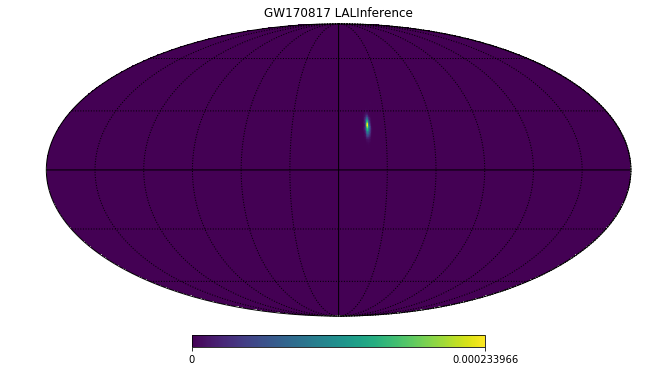

In [0]:
from matplotlib import pyplot as plt 

hp.mollview(prob, title='GW170817 LALInference',)
hp.graticule(local=True)
plt.show()

The value stored at each pixel represents the probability that the gravitational-wave source 
is located within that pixel.

<span style="color:#B22222"> <strong> ↳ </strong> </span> Now we plot the gravitational-wave sky localization using a dedicate package named  [ligo.skymap](https://pypi.org/project/ligo.skymap/).

In [0]:
#@title
from matplotlib import pyplot as plt 

# from ligo.skymap.tool.ligo_skymap_plot import main
# main([gw170818_skymap, '--annotate', '--contour', '50', '90',])
# plt.show()

The plot shows the  the 50% and 90% credible regions. The value of these areas are reported at the top left corner. These contours were constructed ranking the pixels from most probable to least, and finally counted how many pixels summed to a given total probability.

In the next section, we will identify the highest probability pixel in a gravitational-wave sky localization.

###  Finding the maximum probability density pixel
<span style="color:#B22222"> <strong> ↳ </strong> </span> We are identifying the highest probability pixel `ipix_max` and the probability inside it `highest_probability`.

In [0]:
import numpy as np
ipix_max = np.argmax(prob)
highest_probability = prob[ipix_max]

<span style="color:#B22222"> <strong> ↳ </strong> </span> Now we define the sky coordinates `ra`, `dec` of the highest probability pixel.

In [0]:
nside = hp.get_nside(prob) # calculate the healpix resolution - nside

theta, phi = hp.pix2ang(nside, ipix_max)
ra = np.rad2deg(phi)
dec = np.rad2deg(0.5 * np.pi - theta)

ra = round(ra,5); dec = round(dec,12);
print("The sky coordinates of the highest probability pixel are:", "ra =",ra,"dec =",dec, )

The sky coordinates of the highest probability pixel are: ra = 341.2793 dec = 22.386924481902


The function **[hp.pix2ang](https://healpy.readthedocs.io/en/stable/generated/healpy.pixelfunc.pix2ang.html#healpy.pixelfunc.pix2ang)** converts from pixel index to spherical polar coordinates; the function **[hp.ang2pix](https://healpy.readthedocs.io/en/stable/generated/healpy.pixelfunc.ang2pix.html#healpy.pixelfunc.ang2pix)** does the reverse.

**Alternatively, you can use [astropy-healpix](https://astropy-healpix.readthedocs.io/en/latest/installation.html) to perform the same tasks.** Recommendation for the Windows OS users.

In [0]:
from astropy.io import fits
hdulist = fits.open("https://dcc.ligo.org/public/0157/P1800381/002/GW170818_skymap.fits.gz")

hdulist[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   32 / length of dimension 1                          
NAXIS2  =             12582912 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    4 / number of table fields                         
TTYPE1  = 'PROB    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'pix-1   '                                                            
TTYPE2  = 'DISTMU  '                                                            
TFORM2  = 'D       '        

In [0]:
from astropy_healpix.healpy import pix2ang

hdulist[1].header['NSIDE'] # get the healpix resolution - nside - from the header

theta, phi = hp.pix2ang(nside, ipix_max)
ra = np.rad2deg(phi)
dec = np.rad2deg(0.5 * np.pi - theta)

ra = round(ra,5); dec = round(dec,12);
print("The sky coordinates of the highest probability pixel are:", "ra =",ra,"dec =",dec, )

The sky coordinates of the highest probability pixel are: ra = 341.2793 dec = 22.386924481902


## Working with GW170817 - BNS Merger

On August 17, 2017 astronomers around the world were alerted to gravitational waves observed by the Advanced LIGO and Advanced Virgo detectors. This gravitational wave event, now known as GW170817, appeared to be the result of the merger of two neutron stars (BNS). Less than two seconds after the GW170817 signal, NASA's [Fermi](https://fermi.gsfc.nasa.gov/) satellite observed a gamma-ray burst, now known as GRB170817A, and within minutes of these initial detections telescopes around the world began an extensive observing campaign. The [Swope telescope](http://obs.carnegiescience.edu/swope) in Chile was the first to report a bright optical source (SSS17a/AT2017gfo) in the galaxy NGC 4993 and several other teams independently detected the same transient over the next minutes and hours.  
GW170817 marks a new era of multi-messenger astronomy, where the same event is observed by both gravitational waves and electromagnetic waves. [The Dawn of Multi-Messenger Astrophysics: Observations of a Binary Neutron Star Merger](http://ligo.org/science/Publication-GW170817MMA/). 



####  ↳ Loading the skymap from the [GWOS](https://www.gw-openscience.org/catalog/) in Aladin
* [Using Aladin GUI](https://drive.google.com/open?id=1DlWUxzqgSZpYAckaq58ZGMXHlJAaEwc4) <em>Copy and Paste the link in the Command Bar </em>

####  ↳ Reading the header
* [Using Aladin GUI](https://drive.google.com/open?id=1sl3_uedBfbbOLvSZCdckSQKPJZwWzyxE) <em>Edit → Fits header </em>
           .
           .
           .
        DISTMEAN=    38.59 / Posterior mean distance (Mpc)
        DISTSTD =     6.99 / Posterior standard deviation of distance (Mpc)
           .
           .
           .

####  ↳ Creating the 90% confidence level 
* [Using Aladin GUI](https://drive.google.com/open?id=1aH-YvEyN9xeD9kGZkQ7ASXNcDK-33KUt) <em>Coverage → Generate a MOC based on... → The current probability skymap → MOC generation window </em>


####  ↳ Setting Drawing method
* [Using Aladin GUI](https://drive.google.com/open?id=1Xy6S-y9SRB_TIKFYcecUrXtqdAZ96YcI) <em> Aladin stack → Select the plane → right-click → Properties...  → Properties window   </em>

####  ↳ Querying the GLADE catalog (v2.3)
* [Using Aladin GUI](https://drive.google.com/open?id=11rCSzdUd4AP49T26ujOyQfZ0CQ4e9KP1) <em> Aladin data collections tree → Select → click on the catalog item → in the popup menu check  → by region&MOC   </em>

####  ↳ Filtering the galaxies  according with the distance information
* [Using Aladin GUI](https://drive.google.com/open?id=1FJ0GtEt4qXOtEmET7mXtCW_0lggouXUm) <em> Catalog →  Create a filter  → Properties window → Advanced mode → Or enter your filter definition: `${Dist}>31 && ${Dist}<45 {draw}`    </em>
 
####  ↳ Search for the host galaxy NGC 4993
* [Using Aladin GUI](https://drive.google.com/open?id=1cSeL3HJBAEXAqBOGSdb5zTAAZPhpVPpM) <em>Type in the Command bar: NGC 4993    </em>